In [62]:
%pylab inline

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib import animation
from matplotlib.collections import PatchCollection

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [63]:
RJupiter = 6.99e9                 # radius of Jupiter, cm
mJupiter = 1.898e30               # mass of Jupiter, grams
v = 1e5                           # damping coefficient
gamma = 2                         # polytrope index
G = 6.67e-8                       # dyne*cm^2/g^2
rhoC = 5                          # g/cm^3, central density
K = 2.6e12                        # dyne*cm^4/g^2
alpha = np.sqrt(K/(2*np.pi*G))    # distribution constant
h = 5.5e8                           # smoothing length, 5.5e8 gives nice clumping
                                  # 5.5e9 gives collapse to center
N1 = 250                          # Particles in planet 1

In [64]:
### --- Distribution Case 1 --- ###
# xyDistribution = np.array(([1.0e8, 1.0e8], 
#                            [-1.0e8, -1.0e8])) 
# nParticles = len(xyDistribution)

### --- Distribution Case 1.5 --- ###
xyDistribution = np.array(([1.0e8, 1.0e8], 
                           [-1.0e8, -5.0e8],
                           [0.0, 1.0e8]))
nParticles = len(xyDistribution)

### --- Distribution Case 2 --- ###
# nParticles = 250
# xyDistribution = np.random.normal(0,5e7, size=(nParticles, 2))

In [65]:
def densityUpdate():
    
    global xyDistribution
    global rhoDistribution
    global mDistribution

    rhoDistribution = np.zeros_like(rhoDistribution)
    # "Self-density" contribution
    for i in range(0, nParticles):
#        rhoDistribution[i] = mDistribution[i]*W(0, h)
        
        # Density contribution from other particles
        for j in range(i, nParticles):
            xdist = (xyDistribution[i,0]-xyDistribution[j,0])
            ydist = (xyDistribution[i,1]-xyDistribution[j,1])
            dist_ij = np.sqrt(xdist**2 + ydist**2)
            rho_ij = mDistribution[i]*W(dist_ij, h)
            rhoDistribution[i] += rho_ij
            rhoDistribution[j] += rho_ij

In [66]:
def W(dist, h):
    '''
    Inputs:
        dist: a scalar distance between particles i an j
        h: smoothing length
    '''
    if dist < h:
        return 2/(np.pi*h**3) * \
               (1/4*(2-dist/h)**3 - (1-dist/h)**3)
    elif dist > 2 * h:
        return 0
    else:
        return 1/(np.pi*h**3) * (1/4*(2-dist/h)**3)

In [67]:
velocityDistribution = np.zeros_like(xyDistribution)
rhoDistribution = np.zeros(nParticles)
mDistribution = np.ones(nParticles)*mJupiter/nParticles
densityUpdate()
pressureDistribution = K * rhoDistribution ** gamma

print rhoDistribution

[ 6895.82220029  7096.31939442  6858.55879622  7003.51775694  7074.77798872
  7088.61570421  6983.15392596  7109.98858638  6970.16915428  6977.92029572
  6991.94508552  6782.11721974  7024.7172572   6866.97892275  6949.97158394
  7081.15132731  6644.54696818  6977.25933439  7018.7283738   6996.80423018
  6867.81917935  7012.09502916  6783.64466384  7014.07308585  7106.04480899
  6839.39773478  7095.18943499  6869.68387004  6954.99141997  7094.59421513
  7100.22554932  6937.71640055  7104.21703052  6816.21371744  7113.92362698
  6776.50479099  6623.51839281  7102.02772995  6795.84050968  6821.80800085
  6977.76616759  7097.73926298  7114.57071294  7009.7747133   7103.46714698
  6927.44604714  6964.14867594  7076.66162913  6620.23860562  7068.1948798
  6842.43070172  7025.71036526  6845.70129208  6977.04873883  6768.5015872
  7062.51306855  7007.29380606  7046.59307138  7086.25900876  7085.10800935
  7030.09089456  6952.71978386  7030.5248932   7064.57607734  6972.89417568
  7056.4303554

<matplotlib.colorbar.Colorbar instance at 0x0000000013870048>

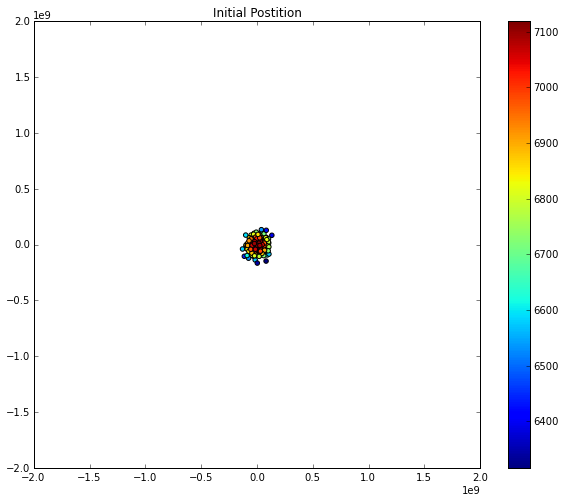

In [68]:
plt.figure(figsize=(10,8))
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c=rhoDistribution)
plt.xlim(-2e9, 2e9)
plt.ylim(-2e9, 2e9)
plt.title("Initial Postition")
plt.plot()
plt.colorbar()